In [1]:
import pandas as pd
import json
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from ipynb.fs.full.common import *

look_only_at_useful_gameplays = True


In [2]:
# load questionresponses and expand the response columns to contain "lastentry" and "secondlastentry" instead of 'A', 'B' or 'BOTH'
questionresponses = pd.json_normalize(pd.Series(open(r"C:\Users\Yasmine Bogaert\Documents\thesis\dump\dump_30-03-2021\csv\questionresponses.json").readlines()).apply(json.loads))
questionresponses = drop_duplicates_questionresponses(questionresponses)
questionresponses = expand_questionresponses(questionresponses)

In [3]:
gameplays = pd.json_normalize(pd.Series(open(r"C:\Users\Yasmine Bogaert\Documents\thesis\dump\dump_30-03-2021\csv\gameplays.json").readlines()).apply(json.loads))

In [4]:
gameplays = preprocess_gameplays(gameplays)

In [5]:
gameplays = add_distance_per_jump(gameplays)

In [6]:
# umap needs numeric values
gameplays = convert_collisionObstacle_numeric(gameplays)

In [7]:
if look_only_at_useful_gameplays:
    gameplays, questionresponses = filter_useful_gameplays_questionresponses(gameplays, questionresponses)

C:\Users\Yasmine Bogaert\Documents\thesis\common.ipynb:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "# get all the id's that occur in questionresponses as a list\n",


In [8]:
# sweep through all umap parameters, turns out the default parameters are good
if False:
    sns.set(style='white', context='notebook', rc={'figure.figsize':(30,20)})

    ns = [2, 5, 10, 20, 50, 100, 200]
    ds = [0.0, 0.1, 0.25, 0.5, 0.8, 0.99]
    x = len(ns)
    y = len(ds)

    game_data = gameplays[parameters].values

    fig, ax_array = plt.subplots(x, y)
    for i, n in enumerate(ns):
        for j, d in enumerate(ds):
            print( "({},{}) from ({},{})".format(i,j,len(ns),len(ds)) )
            u = umap_fit(game_data, n, d)
            ax = ax_array[i,j]
            ax.scatter(u[:,0], u[:,1])
            ax.text(0.99, 0.99, "n_neighbors: " + str(n) + ", min_dist: " + str(d)  , horizontalalignment='right', verticalalignment='top',  transform=ax.transAxes)
        

In [9]:
# fit umap on game data
relevant_parameters = parameters + ['distance_per_jump']
game_data = gameplays[parameters].values
u = umap_fit(game_data)

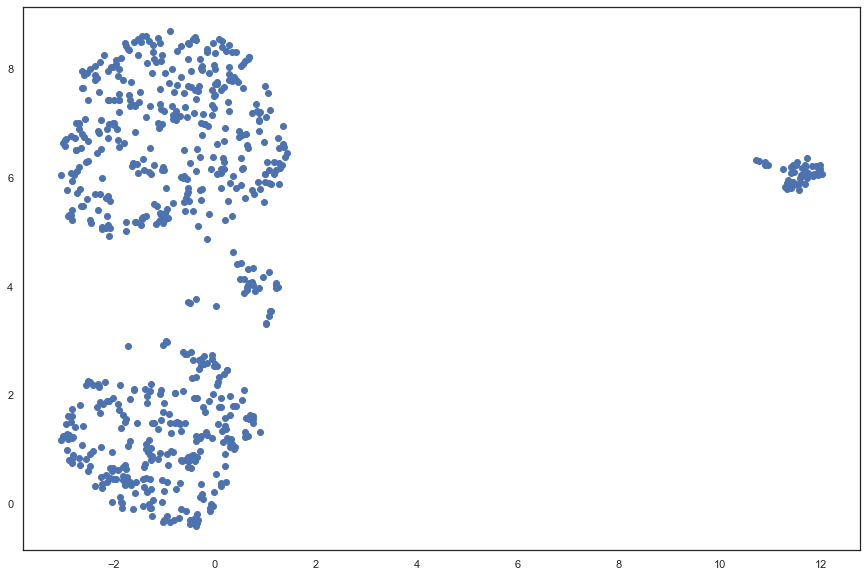

In [10]:
# default scatter, no color
sns.set(style='white', context='notebook', rc={'figure.figsize':(15,10)})
plt.scatter(u[:,0], u[:,1])

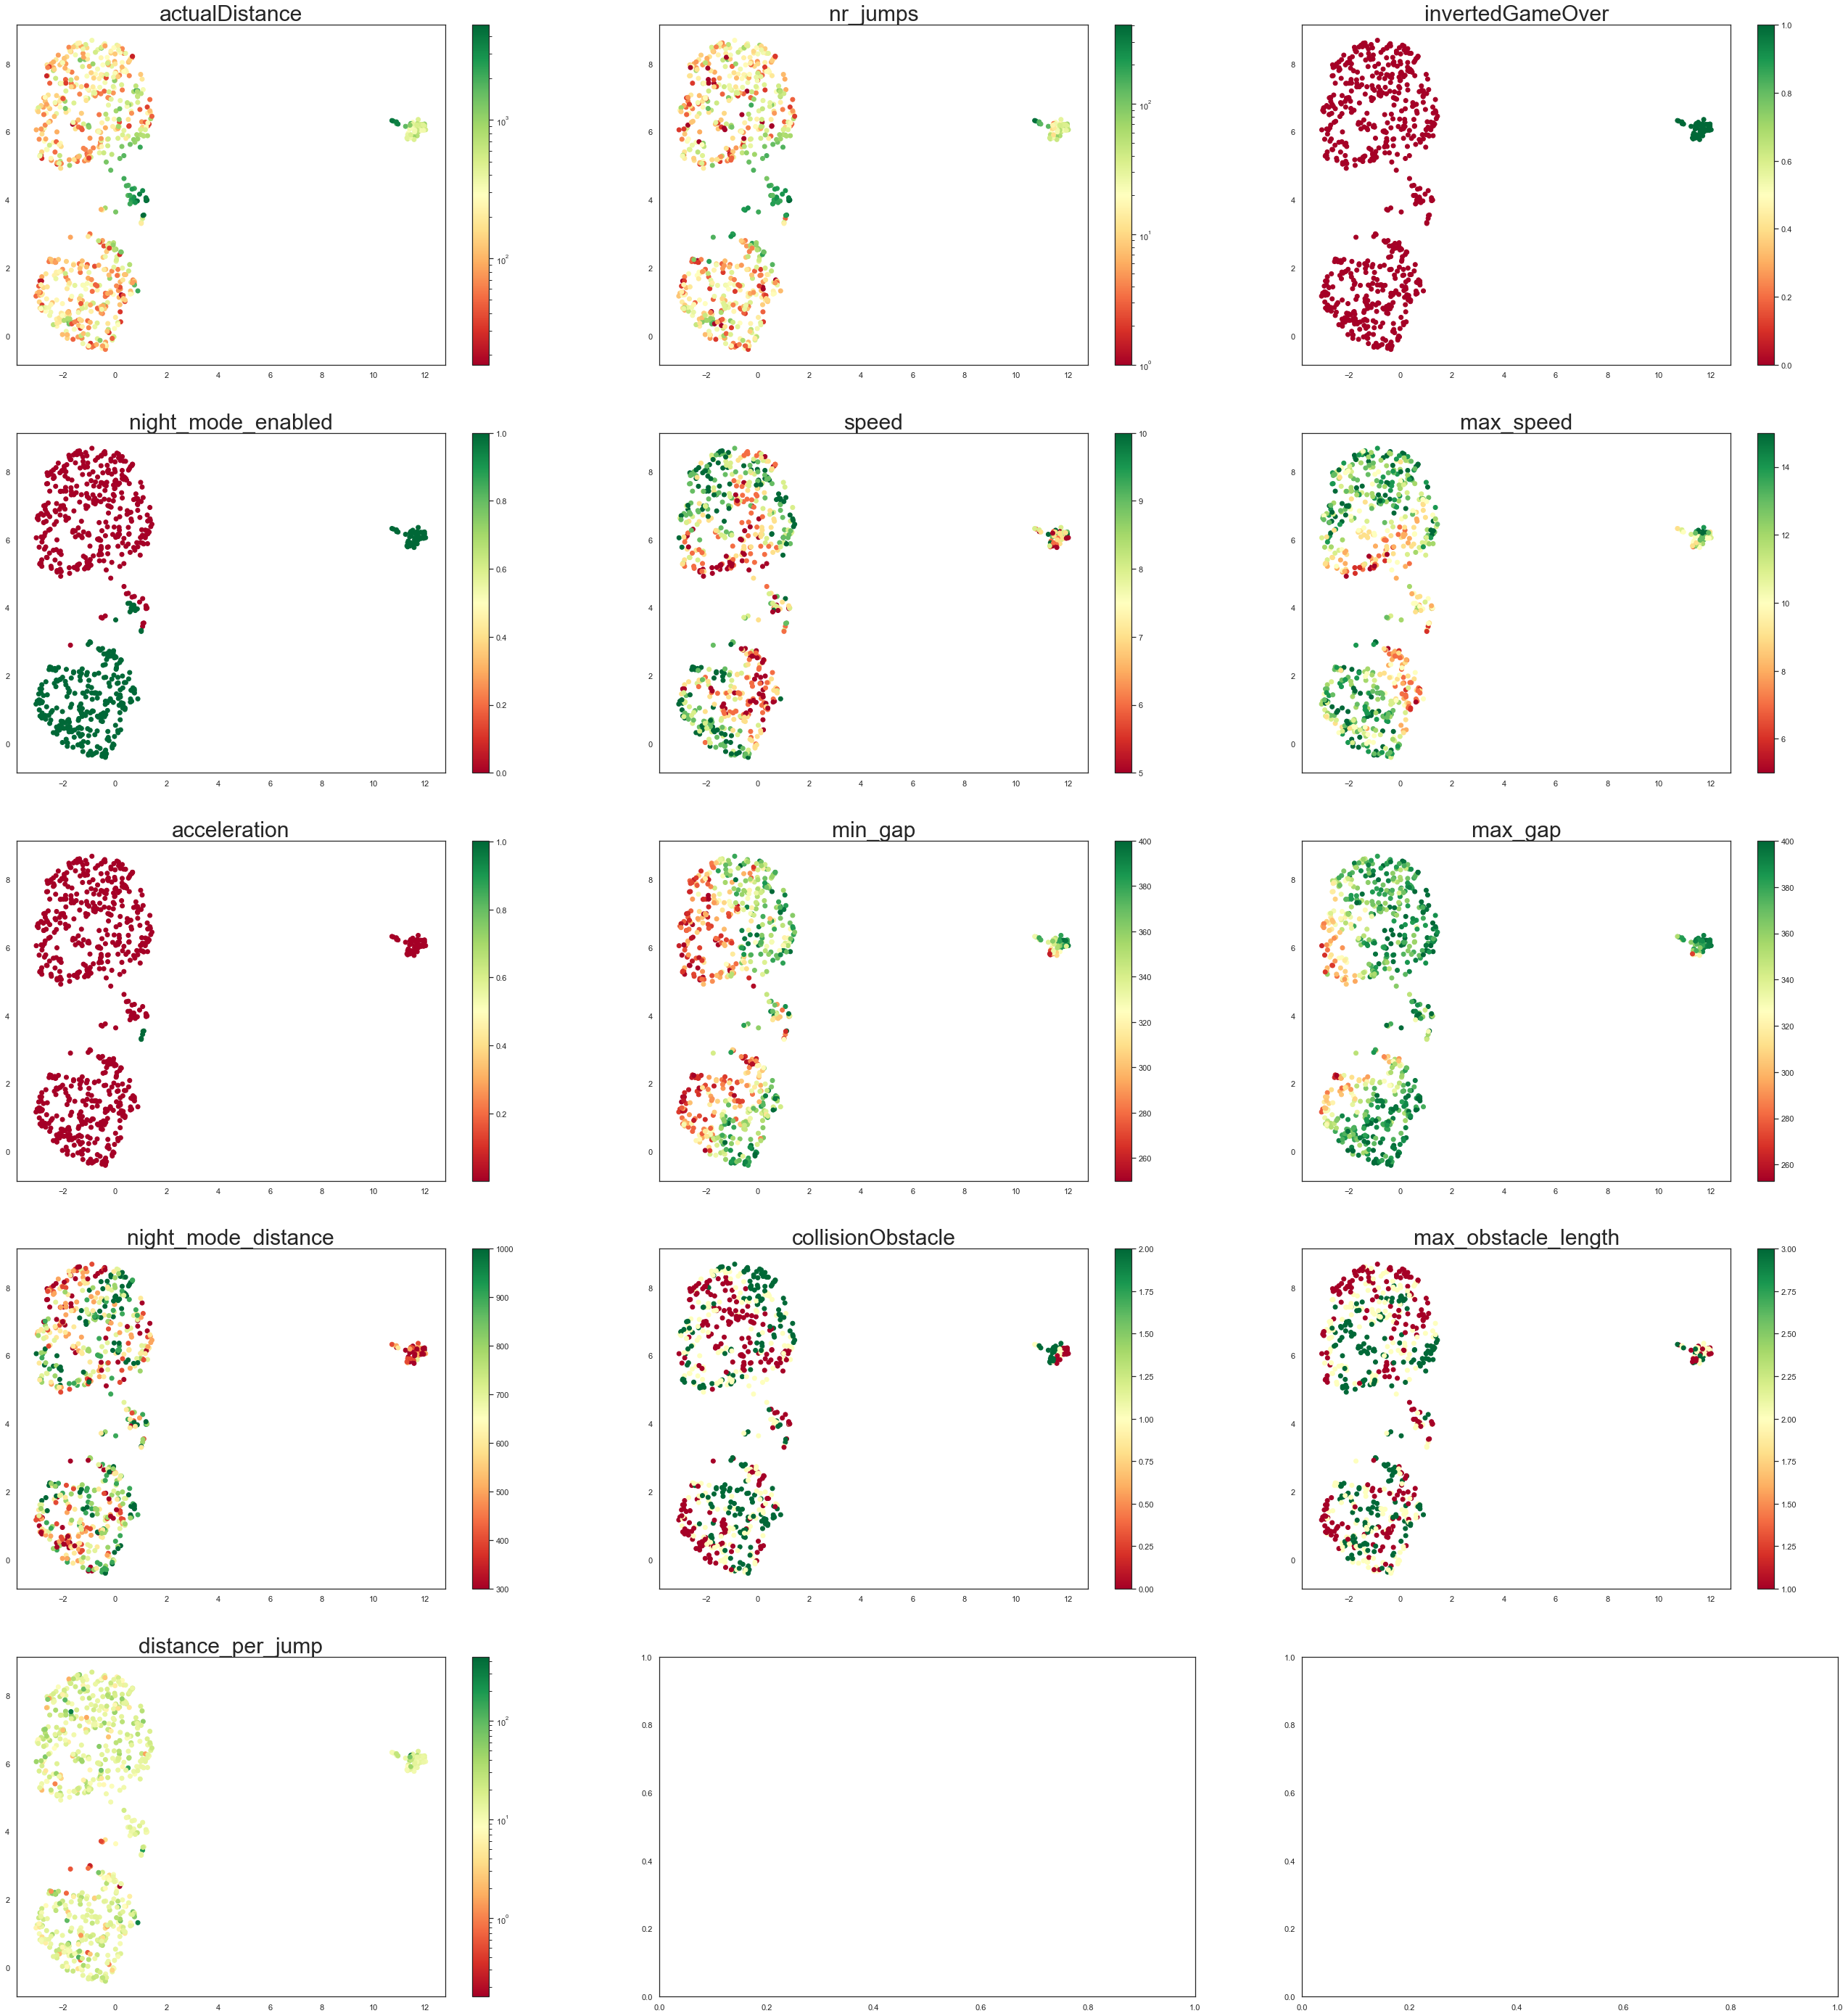

In [11]:
# scatter with color variables
def scatter_umap_color(fit, title='umap scatter', color_values = None, color_map = None, color_norm = None, ax=None):
    if ax is not None:
        p = ax.scatter(fit[:,0], fit[:,1], c = color_values, cmap=color_map, norm=color_norm)
        fig.colorbar(p, ax = ax)
        ax.title.set_text(title) 
        ax.title.set_size(30) 
    else:
        plt.figure()
        p = plt.scatter(fit[:,0], fit[:,1], c = color_values, cmap=color_map, norm=color_norm)
        plt.colorbar(p)
        plt.title(title, fontsize=15)
        

l = [
    {   
        'title' : 'actualDistance',
        'color_values': gameplays['actualDistance'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': matplotlib.colors.LogNorm()
    },
    {   
        'title' : 'nr_jumps',
        'color_values': gameplays['nr_jumps'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': matplotlib.colors.LogNorm()
    },
    {   
        'title' : 'invertedGameOver',
        'color_values': gameplays['invertedGameOver'].apply(lambda x: 1 if x else 0), 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'night_mode_enabled',
        'color_values': gameplays['parameters.NIGHT_MODE_ENABLED'].apply(lambda x: 1 if x else 0), 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'speed',
        'color_values': gameplays['parameters.SPEED'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'max_speed',
        'color_values': gameplays['parameters.MAX_SPEED'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'acceleration',
        'color_values': gameplays['parameters.ACCELERATION'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'min_gap',
        'color_values': gameplays['parameters.MIN_GAP'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'max_gap',
        'color_values': gameplays['parameters.MAX_GAP'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'night_mode_distance',
        'color_values': gameplays['parameters.NIGHT_MODE_DISTANCE'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'collisionObstacle',
        'color_values': gameplays['collisionObstacle.typeConfig.type'],
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },    
    {   
        'title' : 'max_obstacle_length',
        'color_values': gameplays['parameters.MAX_OBSTACLE_LENGTH'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': None
    },
    {   
        'title' : 'distance_per_jump',
        'color_values': gameplays['distance_per_jump'], 
        'color_map': plt.get_cmap('RdYlGn'),
        'color_norm': matplotlib.colors.LogNorm()
    },
    
    
]

import math
l_len = len(l)
n_columns = 3
y = math.floor(n_columns)
x = math.ceil(l_len / y)
sns.set(style='white', context='notebook', rc={'figure.figsize':(15*y,10*x)})
fig, ax_array = plt.subplots(x, y) 
for n, entry in enumerate(l):
    i = math.floor(n/n_columns)
    j = n % n_columns
    ax = ax_array[i,j]
    scatter_umap_color(u, title=entry['title'], color_values=entry['color_values'], color_map=entry['color_map'], color_norm=entry['color_norm'], ax = ax)
fig_title = 'graphs/notebook/umap/umap_useful_gameplays_parameters_colored.png' if look_only_at_useful_gameplays else 'graphs/notebook/umap/umap_gameplays_parameters_colored.png'
plt.savefig(fig_title)

In [12]:
gameplays['parameters.ACCELERATION'].groupby(gameplays['parameters.ACCELERATION']).count()

parameters.ACCELERATION
0.002    699
1.002      5
Name: parameters.ACCELERATION, dtype: int64

In [13]:
def evaluation_score(questionresponses, gameplays, parameter):
    exploded = explode_questionresponses(questionresponses, gameplays)
    evaluation = exploded[['entry', parameter]].groupby('entry').mean()
    return evaluation[parameter]

ev = evaluation_score(questionresponses, gameplays, 'challenging')

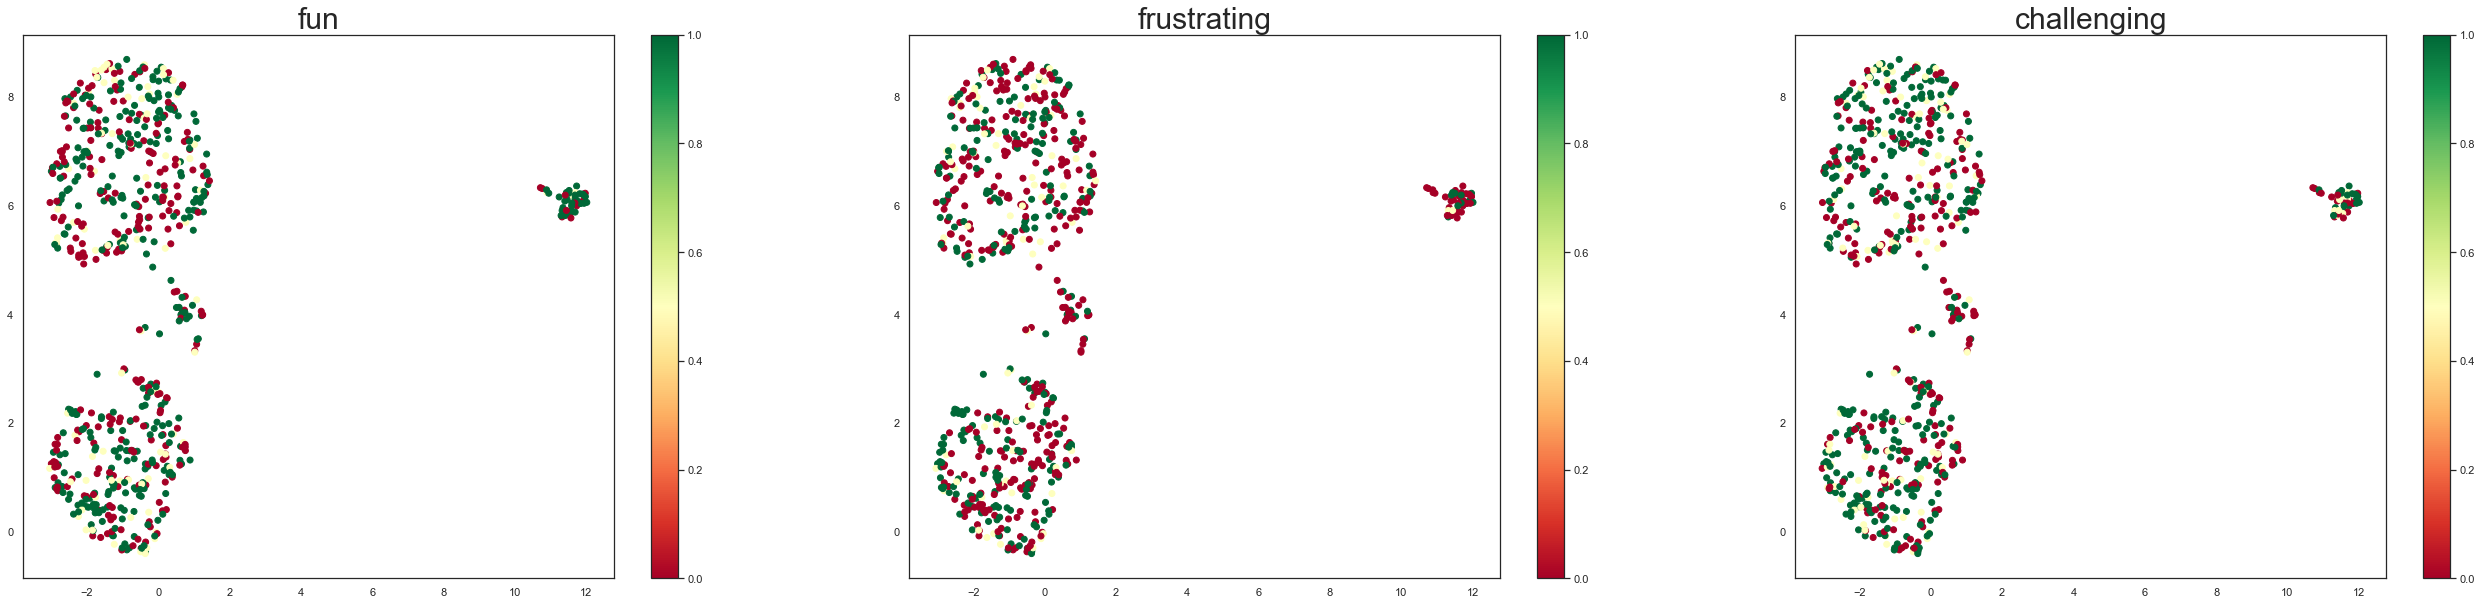

In [14]:
if look_only_at_useful_gameplays:
    sns.set(style='white', context='notebook', rc={'figure.figsize':(45,10)})
    fig, ax_array = plt.subplots(1, 3) 
    for i, column in enumerate(ffc_columns):
        ax = ax_array[i]
        color_values = evaluation_score(questionresponses, gameplays, column)
        scatter_umap_color(u, title=column, color_values=color_values, color_map=plt.get_cmap('RdYlGn'), ax = ax)
    plt.savefig('graphs/notebook/umap/umap_useful_gameplays_evaluation_colored.png')

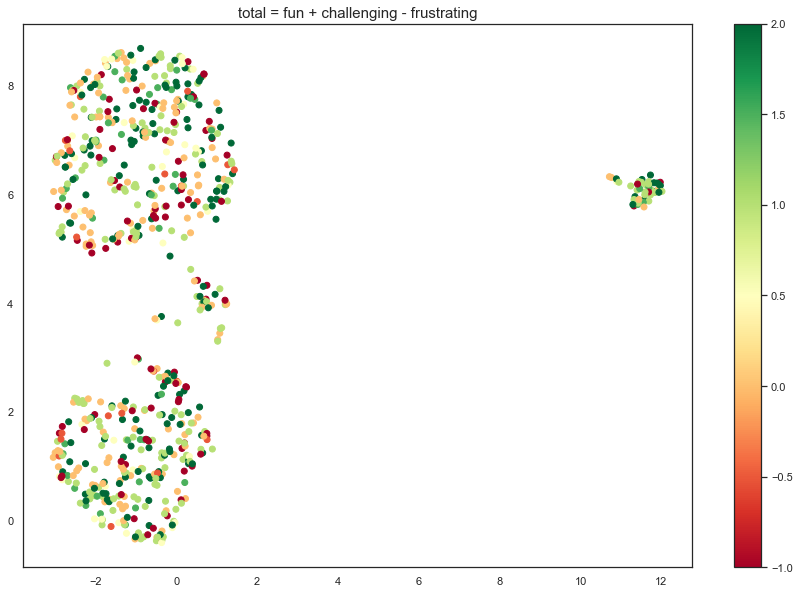

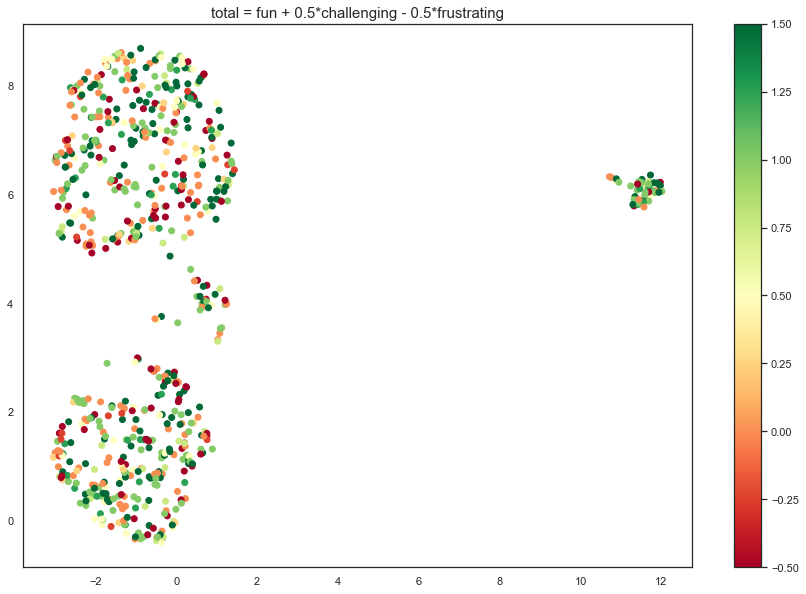

In [15]:
def get_total_evaluation_score(gameplays, questionresponses, fun_factor, challenging_factor, frustrating_factor):
    evaluations = dict()
    for column in ffc_columns:
        evaluations[column] = evaluation_score(questionresponses, gameplays, column)

    # total = fun + challenging - frustrating
    total = [fun_factor*fun + challenging_factor*challenging for fun, challenging in zip(evaluations['fun'], evaluations['challenging'])]
    total = [subtotal - frustrating_factor*frustrating for subtotal, frustrating in zip(total, evaluations['frustrating'])]
    
    return total

def draw_total_scatter(fun_factor = 1, challenging_factor = 1, frustrating_factor = 1):    
    total = get_total_evaluation_score(gameplays, questionresponses, fun_factor, challenging_factor, frustrating_factor)

    sns.set(style='white', context='notebook', rc={'figure.figsize':(15,10)})
    fig_title = 'total = fun + {}challenging - {}frustrating'.format(str(challenging_factor) + "*" if challenging_factor != 1 else "", str(frustrating_factor) + "*" if frustrating_factor != 1 else "")
    scatter_umap_color(u, title=fig_title, color_values=total, color_map=plt.get_cmap('RdYlGn'))
    plt.savefig('graphs/notebook/umap/umap_useful_gameplays_total_evaluation_colored_(fun_{}_frustrating_{}_challenging_{}).png'.format(fun_factor, frustrating_factor, challenging_factor))

draw_total_scatter(1,1,1)
draw_total_scatter(1,0.5,0.5)

In [16]:
total = get_total_evaluation_score(gameplays, questionresponses, 1, 1, 1)

g = gameplays
g['total_score'] = total
invertedgameovers = g.loc[g['invertedGameOver']]
lowscore = invertedgameovers.loc[invertedgameovers['total_score'] < 0]
lowscore

interesting_gameplay_ids = lowscore['_id.$oid'].values.tolist()

print(interesting_gameplay_ids)

q = questionresponses
q.loc[q['lastentry'].isin(interesting_gameplay_ids) | q['secondlastentry'].isin(interesting_gameplay_ids)]

['5fb829b4b472c8cc964ed88f', '5fc655544d4b4c5ad57a546d', '604bb1f8d030a1c744bdeb3b', '6050eacd7a1bf968e14b7eaf', '6051fa831066e2827b2a39a9']


,secondlastentry,lastentry,fun,challenging,frustrating,time,USERID,_id.$oid,entries,entry
73,5fb82967b472c8cc964ed88d,5fb829b4b472c8cc964ed88f,secondlastentry,secondlastentry,lastentry,8486.810,9cd8f309-beb3-46e8-ac93-bf22b1d4c81e,5fb829bfb472c8cc964ed890,"[5fb82967b472c8cc964ed88d, 5fb829b4b472c8cc964...","[5fb82967b472c8cc964ed88d, 5fb829b4b472c8cc964..."
74,5fb829b4b472c8cc964ed88f,5fb829d3b472c8cc964ed891,neither,neither,"[secondlastentry, lastentry]",7334.605,9cd8f309-beb3-46e8-ac93-bf22b1d4c81e,5fb829ddb472c8cc964ed892,"[5fb829b4b472c8cc964ed88f, 5fb829d3b472c8cc964...","[5fb829b4b472c8cc964ed88f, 5fb829d3b472c8cc964..."
219,5fc655544d4b4c5ad57a546d,5fc656704d4b4c5ad57a546e,lastentry,lastentry,"[secondlastentry, lastentry]",23710.865,a54b582f-566f-4ae2-a1c3-d2af4b131a6f,5fc6568b4d4b4c5ad57a546f,"[5fc655544d4b4c5ad57a546d, 5fc656704d4b4c5ad57...","[5fc655544d4b4c5ad57a546d, 5fc656704d4b4c5ad57..."
279,604bb1a1d030a1c744bdeb39,604bb1f8d030a1c744bdeb3b,secondlastentry,secondlastentry,lastentry,40493.885,781d5ff7-8968-4e7a-b489-ddb73db97c6a,604bb223d030a1c744bdeb3c,"[604bb1a1d030a1c744bdeb39, 604bb1f8d030a1c744b...","[604bb1a1d030a1c744bdeb39, 604bb1f8d030a1c744b..."
371,6050ea927a1bf968e14b7ea2,6050eacd7a1bf968e14b7eaf,secondlastentry,secondlastentry,lastentry,10446.870,7d1a7b8b-7a85-401f-acbd-2834f642ed47,6050eadc7a1bf968e14b7eb5,"[6050ea927a1bf968e14b7ea2, 6050eacd7a1bf968e14...","[6050ea927a1bf968e14b7ea2, 6050eacd7a1bf968e14..."
490,6051fa141066e2827b2a39a6,6051fa831066e2827b2a39a9,neither,neither,"[secondlastentry, lastentry]",18167.795,b1dbb85d-bdee-436e-b781-e869d7c86a3f,6051fa981066e2827b2a39aa,"[6051fa141066e2827b2a39a6, 6051fa831066e2827b2...","[6051fa141066e2827b2a39a6, 6051fa831066e2827b2..."
492,6051fa831066e2827b2a39a9,6051fac91066e2827b2a39ae,neither,neither,"[secondlastentry, lastentry]",4547.060,b1dbb85d-bdee-436e-b781-e869d7c86a3f,6051fad11066e2827b2a39b0,"[6051fa831066e2827b2a39a9, 6051fac91066e2827b2...","[6051fa831066e2827b2a39a9, 6051fac91066e2827b2..."


In [17]:
s = questionresponses['time'].values.tolist()
s.sort()
#s
